# Glauber on infinite random $k$-regular graph
Compute magnetization in the thermodynamic limit $N\to\infty$.

Reproduce the results in *Barthel et. al*, [Matrix product algorithm for stochastic dynamics on networks applied to nonequilibrium Glauber dynamics](https://doi.org/10.1103/PhysRevE.97.010104) for $k=3$.

In [1]:
using MatrixProductBP, MatrixProductBP.Models
using Plots
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

┌ Info: Precompiling MatrixProductBP [3d39929c-b583-45fa-b331-3f50b693a38a]
└ @ Base loading.jl:1662


In [2]:
T = 30         # final time
k = 4           # degree
m⁰ = 0.5       # magnetization at time zero

β = 1.0
J = 1.0
h = 0.0;

In [ ]:
svd_trunc = TruncBond(16)
maxiter = 100
tol = 1e-3
pᵢ⁰ = [(1+m⁰)/2, (1-m⁰)/2]
A, iters, Δs = glauber_infinite_graph(T, k, pᵢ⁰; svd_trunc, maxiter, tol);

Iterating BP on infinite graph   2%|▍                    |  ETA: 0:09:41
  iter:  2/100
  Δ:     0.2671866/0.001

In [ ]:
plot(Δs, ylabel="convergence error", xlabel="iters", yaxis=:log10, 
    size=(300,200), label="")

In [ ]:
# compute magnetization, correlation and covariance
b, m, c = observables_infinite_graph(A, k, pᵢ⁰, wᵢ; svd_trunc, showprogress=true);

In [ ]:
plot(0:T, m, m=:o, xlabel="time", ylabel="magnetization", label="",
    size=(300,300), xticks=0:5:T, ms=2)

Compare with:

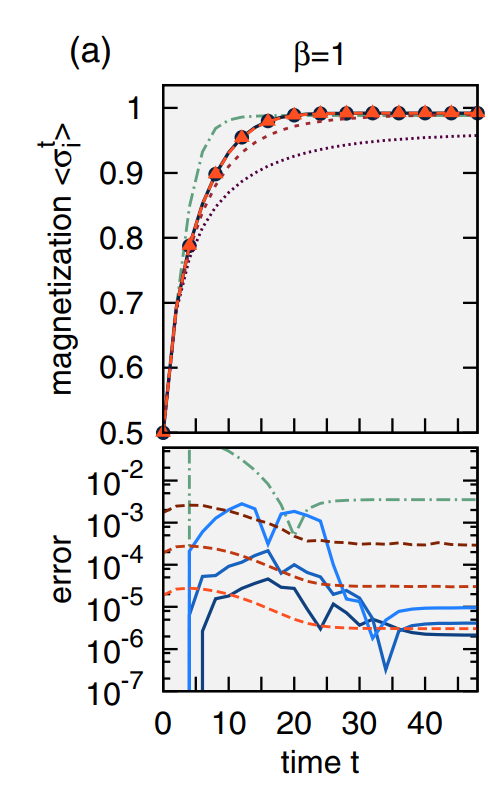

In [ ]:
using ColorSchemes
function plot_autocovs(c, T; skip_even=true, kw...)
    step = skip_even ? 2 : 1
    us = 8:4:T
    cg = cgrad(:matter, length(us), categorical=true)
    ylabel = "\$\\langle\\sigma_i^t\\sigma_i^{t+\\Delta t}\\rangle-" * 
        "\\langle\\sigma_i^t\\rangle\\langle\\sigma_i^{t+\\Delta t}\\rangle \$"
    xlabel = "\$\\Delta t \$"
    pl = plot(;xlabel, ylabel, legend=:outertopright, title="Glauber infinite $k-regular")
     
    for (j,u) in enumerate(us)
        plot!(pl, u:-step:1, c[(0:step:u-1) .+ 1,u+1], label="t+Δt=$u", c=cg[j], m=:o, msc=cg[j]; kw...) 
    end
    pl
end  

In [ ]:
skip_even = true
pl_autocov = plot_autocovs(c, T; skip_even, yaxis=:log10)

Compare with:

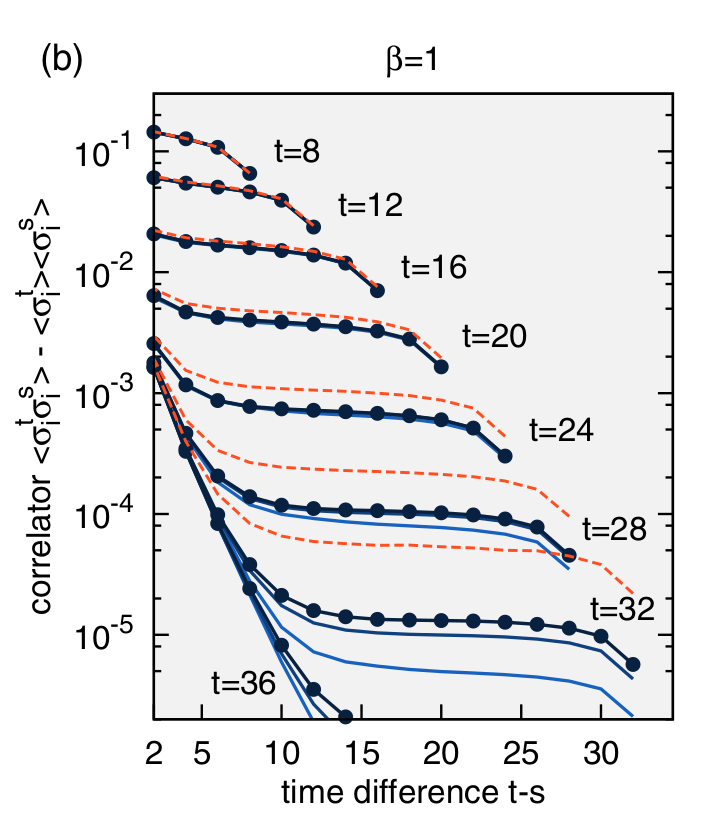